# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, ttest_1samp, ttest_ind
from scipy.stats import norm, sem
from statsmodels.stats.weightstats import ztest

df = pd.read_csv('data/human_body_temperature.csv')

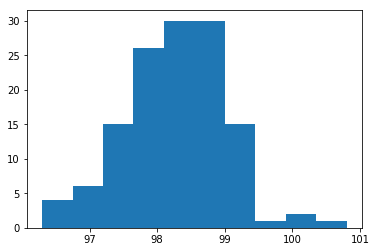

In [2]:
#Create a histogram of temperatures
temps = df['temperature']
_ = plt.hist(temps)
plt.show()

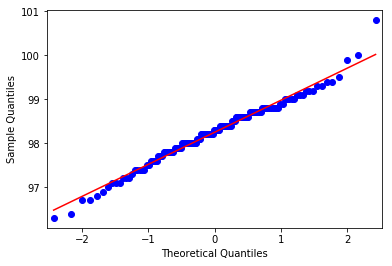

In [3]:
#Create a QQ-plot for temperatures
_ = qqplot(temps, line='s')
plt.show()

The histogram looks approximately normally distributed and the points on our QQ-plot roughly lie on a straight diagonal line, so visually we can be fairly confident that our data is normally distributed.

In [4]:
#Run a Shapiro-Wilk test on temperature data to test for normality
stat, p = shapiro(temps)
print("test statistic: %.3f, p-value: %.3f" % (stat, p))

test statistic: 0.987, p-value: 0.233


The high p-value from running the Shapiro-Wilk test tells us we cannot reject the null hypothesis test that our values are normally distributed, which supports our graphical inspections. 

We have a large enough sample size (generally said to be greater than 30) with independent samples (the temperatures of one subject are not dependent on the temperature of any other subject) that the Central Limit Theorem applies. 

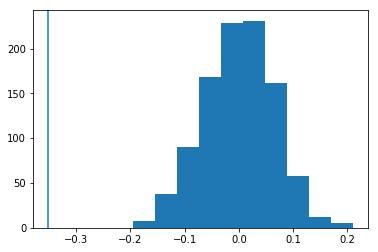

p-value: 0.00000


In [6]:
#Boostrap hypothesis test for one sample mean
theor_mean = 98.6
sample_mean = np.mean(temps)
diff_of_means = sample_mean - theor_mean

#Create new temperature data that fulfills the null hypothesis 
newtemps = temps - sample_mean + theor_mean
#Generate 1000 boostramp samples and take difference of mean and theoretical mean for each
bs_replicates = np.empty(1000)
for i in range(1000):
    bs_sample = np.random.choice(newtemps, size=len(newtemps))
    bs_replicates[i] = np.mean(bs_sample) - theor_mean
#Plot histogram of our theoretical difference and difference of means 
_ = plt.hist(bs_replicates)
_  =plt.axvline(x=diff_of_means)
plt.show()
#Calculate p-value on difference of means
p = np.sum(bs_replicates <= diff_of_means) / len(bs_replicates)
print("p-value: %.5f" % (p))

A bootstrap hypothesis test gives us a low enough p-value that we reject the null hypothesis that the true population mean is 98.6 degrees.

In [7]:
#Run t-test and z-test on our sample mean equaling our theoretical mean
stat, p = ttest_1samp(temps, theor_mean)
print("t statistic: %.3f, p-value: %.3f" % (stat, p))
stat, p = ztest(temps, value=theor_mean)
print("z statistic: %.3f, p-value: %.3f" % (stat, p))

t statistic: -5.455, p-value: 0.000
z statistic: -5.455, p-value: 0.000


We would like to use a one sample test for our frequentist statistical testing since we only have one sample which we are comparing to a theoretical mean. We get the same output for both the z test and the test, since our sample size is greater than 30 and this makes our values normally distributed. 

In [8]:
#Run same t-test and z-test but for sample with 10 values
sample_temps = np.random.choice(temps, size=10)

t_stat, t_p = ttest_1samp(sample_temps, theor_mean)
print("sample t statistic: %.3f, p-value: %.3f" % (t_stat, t_p))
z_stat, z_p = ztest(sample_temps, value=theor_mean)
print("sample z statistic: %.3f, p-value: %.3f" % (z_stat, z_p))

sample t statistic: -2.119, p-value: 0.063
sample z statistic: -2.119, p-value: 0.034


The t test is more appropriate with small samples, and we notice that it gives us a larger p-value.

In [9]:
#Generate both boostrap and frequentist confidence intervals for temperature
bs_temps = np.random.choice(temps, size=1000)
bs_conf_int = np.percentile(bs_temps, [2.5, 97.5])
print("boostrap confidence interval:", bs_conf_int)
freq_conf_int = norm.interval(0.95, loc=np.mean(temps), scale=sem(temps))
print("frequentist confidence interval:", freq_conf_int)

boostrap confidence interval: [ 96.7  99.5]
frequentist confidence interval: (98.123196428181657, 98.375265110279898)


We can say that temperatures greater than 98.4 and lower than 98.1 should be said to be abnormal. We take the less extreme of the temperatures from both confidence intervals, since it would be worse to miss out on an abnormal temperature than it would be to investigate when it is actually normal. It is interesting that this doesn't contain what is assumed to be the average human body temperatur of 98.6.

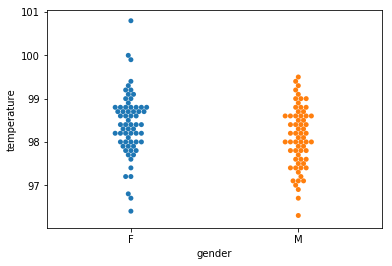

In [10]:
#Create a swarmplot for temperature split by gender
_ = sns.swarmplot(x='gender', y='temperature', data=df)
plt.show()

Our swarmplot suggests that mean female temperature might be higher than mean male temperature, so we can run some quantitative test to see whether this is true and if this difference is (statistically) significant. 

In [11]:
#Boostrap hypothesis test for equality of means
male_temps = df[df['gender'] == 'M']['temperature']
female_temps = df[df['gender'] == 'F']['temperature']
emp_diff_means = np.mean(male_temps) - np.mean(female_temps)

#Create groups with equal means
male_shifted = male_temps - np.mean(male_temps) + np.mean(temps)
female_shifted = female_temps - np.mean(female_temps) + np.mean(temps)

#Define boostrap function
def draw_bs_reps(x, func, size=1):
    bs_replicate = np.empty(size)
    
    for i in range(size):
        bs_sample = np.random.choice(x, size=len(x))
        bs_replicate[i] = func(bs_sample)
        
    return bs_replicate

#Generate boostramp samples and take their difference of means
male_means = draw_bs_reps(male_shifted, np.mean, size=1000)
female_means = draw_bs_reps(female_shifted, np.mean, size=1000)
diff_means = male_means - female_means

#Calculate p-value for difference of means
p = np.sum(diff_means <= emp_diff_means) / len(diff_means)
print("p-value: %.3f" % p)

p-value: 0.006


Using a bootstrap hypothesis test, we get a low p-value, which suggests that we can reject the null hypothesis that the two group means are equal. The difference we see in our samples seems to reflect an actual difference between mean temperatures for men and women. 

In [105]:
#Run a T-test on the mean temperatures of men and women
stat, p = ttest_ind(male_temps, female_temps)
print("t statistic: %.3f, p-value: %.3f" % (stat, p))

t statistic: -2.285, p-value: 0.024


Running a t-test on the means of two samples also seems to suggest an actual difference in mean temperatures because of our low p-value.